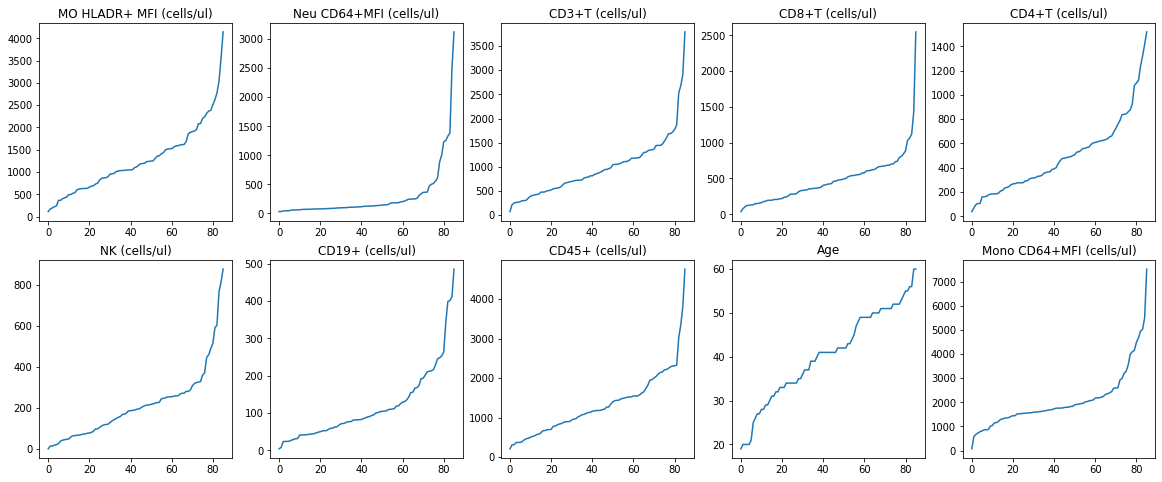

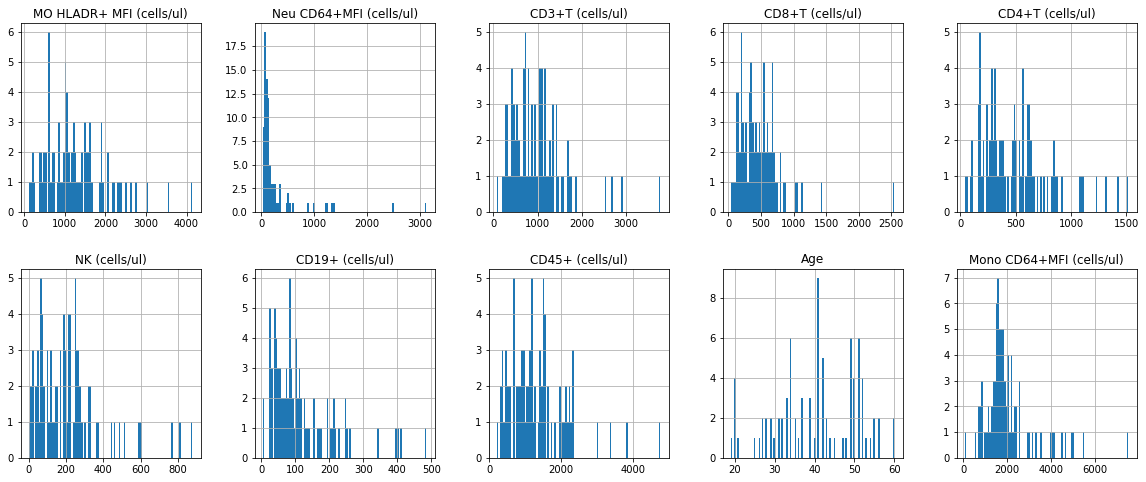

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

MAIN_PATH = 'input/msbd5001-spring-2022/'
TRAIN_PATH = MAIN_PATH + 'train.csv'
TEST_PATH = MAIN_PATH + 'test.csv'

df_train = pd.read_csv(TRAIN_PATH, index_col=0)
df_test = pd.read_csv(TEST_PATH, index_col=0)
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

contin_feat = ['MO HLADR+ MFI (cells/ul)', 'Neu CD64+MFI (cells/ul)', 'CD3+T (cells/ul)', 
               'CD8+T (cells/ul)', 'CD4+T (cells/ul)', 'NK (cells/ul)', 'CD19+ (cells/ul)', 
               'CD45+ (cells/ul)', 'Age', 'Mono CD64+MFI (cells/ul)']
cat_feat = ['Sex 0M1F']

# plot the values in each contin_feat in accending order
fig, ax = plt.subplots(2,5, figsize=(20,8))

for i in range(2):
    for j in range(5):
        col = contin_feat[i*5+j]
        data = df_train[col].sort_values()
        
        ax[i,j].set_title(col)
        ax[i,j].plot(data.values)
plt.show()

# plot the histogram of each contin_feat
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

i = 0
for triaxis in ax:
    for axis in triaxis:
        axis.set_title(contin_feat[i])
        df_train.hist(column = contin_feat[i], bins = 100, ax=axis)
        i = i+1
plt.show()

# normalization
train_label = df_train[['label']].copy()
df_train.drop(columns=['label'], inplace=True)

ct = ColumnTransformer([
        ('standardization', StandardScaler(), contin_feat)
    ], remainder='passthrough')

norm_train = ct.fit_transform(df_train)
norm_test = ct.transform(df_test)
norm_train = pd.DataFrame(data=norm_train, columns=contin_feat+cat_feat)
norm_train['label'] = train_label
norm_test = pd.DataFrame(data=norm_test, columns=contin_feat+cat_feat)
norm_train.index.name='id'
norm_test.index.name='id'
norm_train.to_csv('input/msbd5001-spring-2022/train_normalized.csv')
norm_test.to_csv('input/msbd5001-spring-2022/test_normalized.csv')